In [ ]:
import pandas as pd
import numpy as np

apple_stock_data = pd.read_csv('/content/sample_data/AAPL (1).csv')
apple_stock_data_clean = apple_stock_data.dropna(subset=['Close'])
apple_stock_data_clean['Close'] = pd.to_numeric(apple_stock_data_clean['Close'], errors='coerce')
apple_stock_data_clean = apple_stock_data_clean.dropna(subset=['Close'])

mean = np.mean(apple_stock_data_clean['Close'])
print(f'Mean: {mean:.4f}')

median = np.median(apple_stock_data_clean['Close'])
print(f'Median: {median:.4f}')

mode = apple_stock_data_clean['Close'].mode()[0]
print(f'Mode: {mode:.4f}')

std_dev = np.std(apple_stock_data_clean['Close'])
print(f'Standard Deviation: {std_dev:.4f}')

print(f"\nOriginal number of records: {len(apple_stock_data)}")
print(f"Number of records after cleaning: {len(apple_stock_data_clean)}")
print(f"Number of records removed: {len(apple_stock_data) - len(apple_stock_data_clean)}")

print("\nFirst few rows of cleaned data:")
print(apple_stock_data_clean.head())


Mean: 9.0189
Median: 0.4375
Mode: 0.3996
Standard Deviation: 16.8675

Original number of records: 10016
Number of records after cleaning: 10015
Number of records removed: 1

First few rows of cleaned data:
         Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.101261  469033600.0
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095978  175884800.0
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088934  105728000.0
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.091135   86441600.0
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093777   73449600.0


<ipython-input-5-143d2ac4f0ca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_data_clean['Close'] = pd.to_numeric(apple_stock_data_clean['Close'], errors='coerce')


--- Data Loading and Basic Exploration ---

First 5 rows:
   Comments  Shares  Views  User_Followers  User_Following  User_Likes
0       200     400  70000            2000             500        6000
1       180     210  50000            1500             350        4000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Comments        2 non-null      int64
 1   Shares          2 non-null      int64
 2   Views           2 non-null      int64
 3   User_Followers  2 non-null      int64
 4   User_Following  2 non-null      int64
 5   User_Likes      2 non-null      int64
dtypes: int64(6)
memory usage: 224.0 bytes
None

Basic Statistics:
         Comments      Shares         Views  User_Followers  User_Following  \
count    2.000000    2.000000      2.000000        2.000000        2.000000   
mean   190.000000  305.000000  60000.000000  

<ipython-input-9-c581dea2aa3d>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_stats = df.groupby('Performance_Category').agg({


<Axes: >

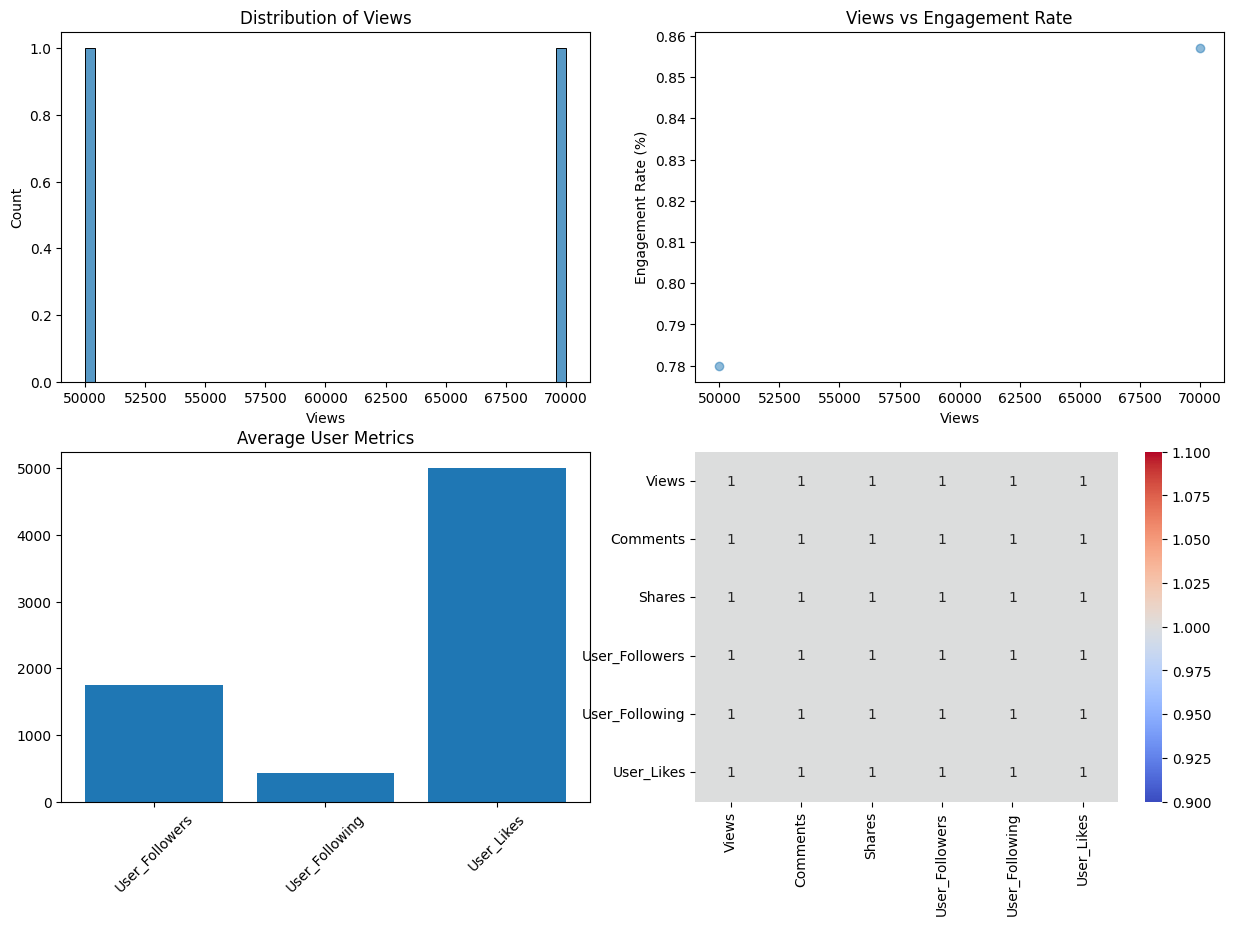

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('test_features.csv')
df = df.drop('Video_Length', axis=1)

print(df.head())
print(df.info())
print(df.describe())

print(df.isnull().sum())
df = df.drop_duplicates()
print(df.shape)

views_array = np.array(df['Views'])
comments_array = np.array(df['Comments'])
shares_array = np.array(df['Shares'])

print(f"Mean views: {np.mean(views_array):.2f}")
print(f"Median views: {np.median(views_array):.2f}")
print(f"Std deviation views: {np.std(views_array):.2f}")

df['Engagement_Rate'] = ((df['Comments'] + df['Shares']) / df['Views']) * 100
df['Follower_Following_Ratio'] = df['User_Followers'] / df['User_Following']

print(df[['Engagement_Rate', 'Follower_Following_Ratio']].describe())

correlation_matrix = df[['Views', 'Comments', 'Shares', 'User_Followers', 'User_Following', 'User_Likes']].corr()
print(correlation_matrix)

df['Performance_Category'] = pd.qcut(df['Views'], q=4, labels=['Low', 'Medium', 'High', 'Viral'])
performance_stats = df.groupby('Performance_Category').agg({
    'Views': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement_Rate': 'mean'
}).round(2)
print(performance_stats)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Views', bins=50)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.scatter(df['Views'], df['Engagement_Rate'], alpha=0.5)
plt.title('Views vs Engagement Rate')
plt.xlabel('Views')
plt.ylabel('Engagement Rate (%)')

plt.subplot(2, 2, 3)
user_metrics = df[['User_Followers', 'User_Following', 'User_Likes']].mean()
plt.bar(user_metrics.index, user_metrics.values)
plt.title('Average User Metrics')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


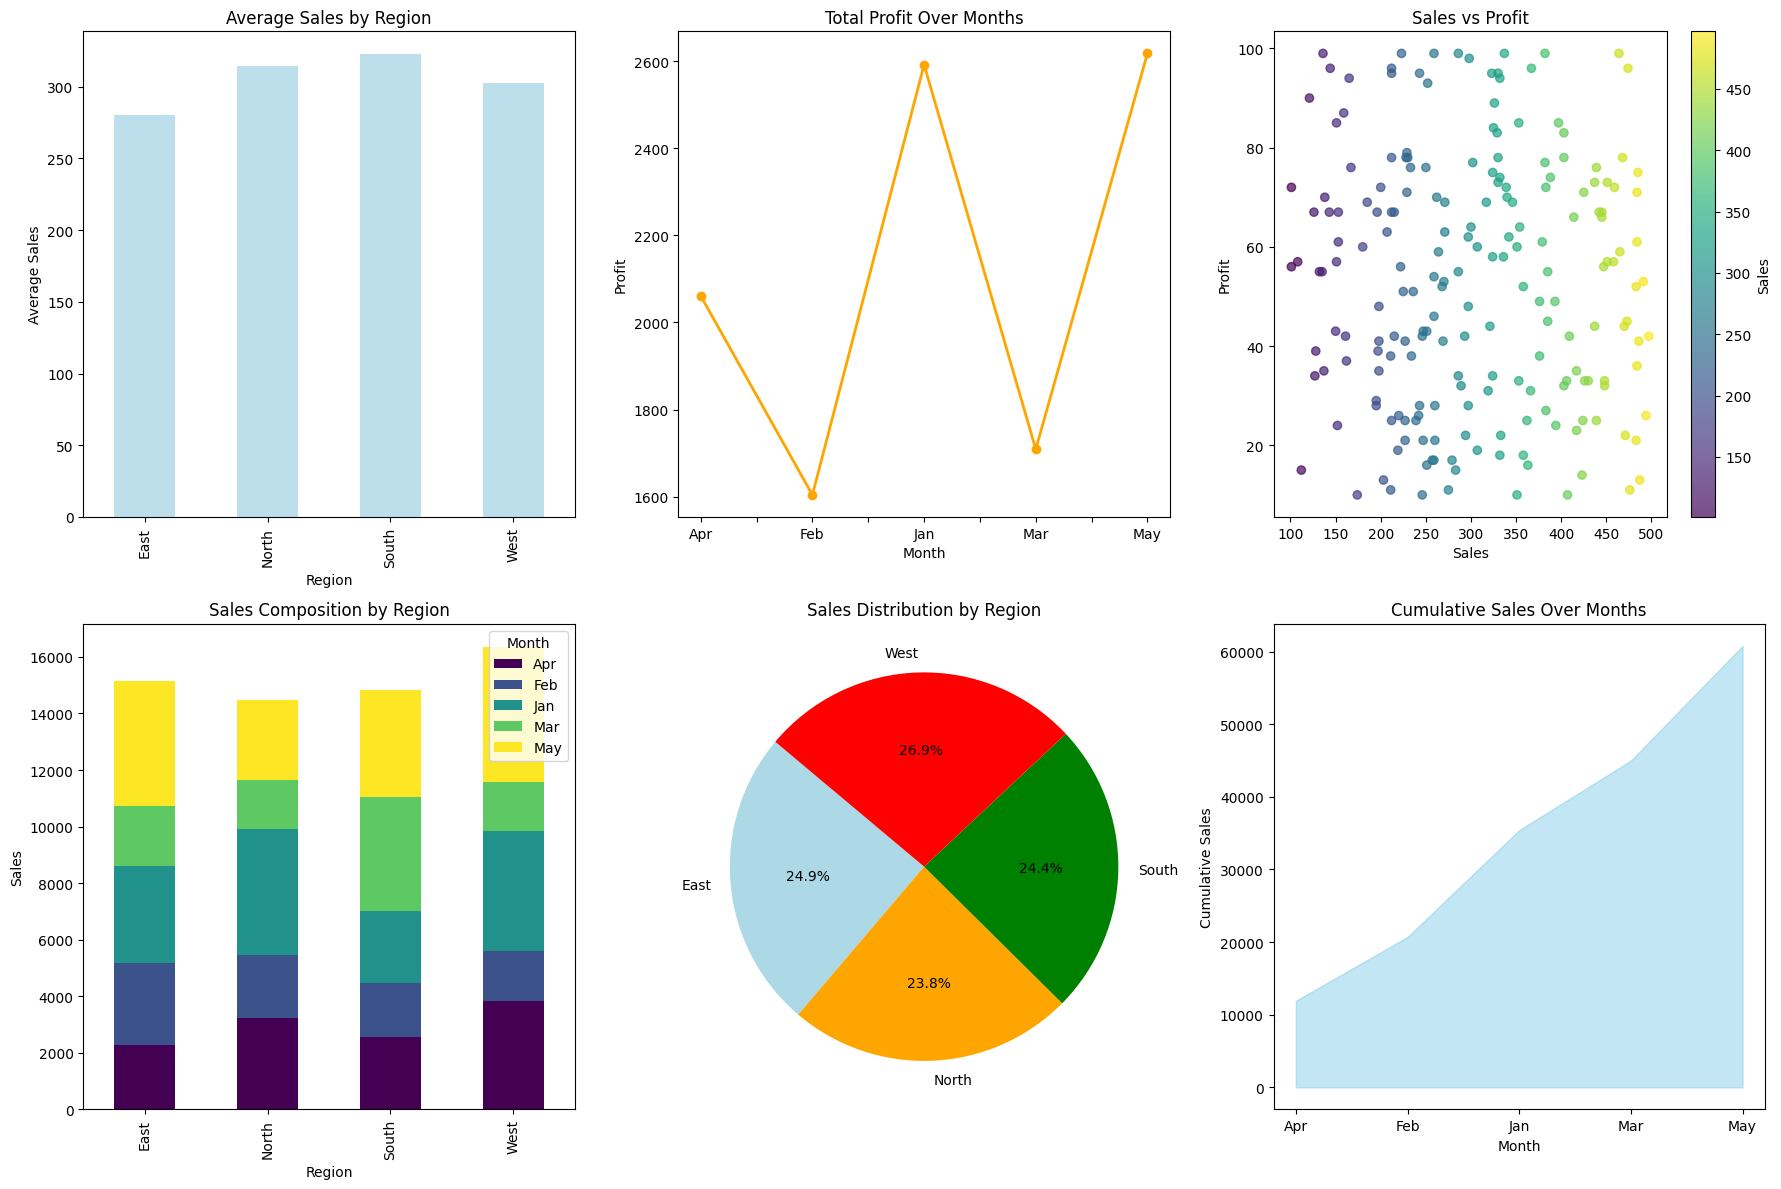

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
data = pd.DataFrame({
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 200),
    'Sales': np.random.randint(100, 500, 200),
    'Profit': np.random.randint(10, 100, 200),
    'Month': np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May'], 200)
})


plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
avg_sales_region = data.groupby('Region')['Sales'].mean()
avg_sales_region.plot(kind='bar', color='lightblue', alpha=0.8)
plt.title("Average Sales by Region")
plt.ylabel("Average Sales")
plt.xlabel("Region")


plt.subplot(2, 3, 2)
monthly_profit = data.groupby('Month')['Profit'].sum()
monthly_profit.sort_index().plot(marker='o', linewidth=2, color='orange')
plt.title("Total Profit Over Months")
plt.ylabel("Profit")
plt.xlabel("Month")


plt.subplot(2, 3, 3)
plt.scatter(data['Sales'], data['Profit'], alpha=0.7, c=data['Sales'], cmap='viridis')
plt.colorbar(label='Sales')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")


plt.subplot(2, 3, 4)
region_month_sales = data.pivot_table(values='Sales', index='Region', columns='Month', aggfunc='sum', fill_value=0)
region_month_sales.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title("Sales Composition by Region")
plt.ylabel("Sales")
plt.xlabel("Region")

plt.subplot(2, 3, 5)
region_sales = data.groupby('Region')['Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'green', 'red'])
plt.title("Sales Distribution by Region")


plt.subplot(2, 3, 6)
cumulative_sales = data.groupby('Month')['Sales'].sum().cumsum()
plt.fill_between(range(len(cumulative_sales)), cumulative_sales, color='skyblue', alpha=0.5)
plt.title("Cumulative Sales Over Months")
plt.xlabel("Month")
plt.ylabel("Cumulative Sales")
plt.xticks(range(len(cumulative_sales)), cumulative_sales.index)


plt.tight_layout()
plt.show()


<ipython-input-12-b6ad23ea28ef>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


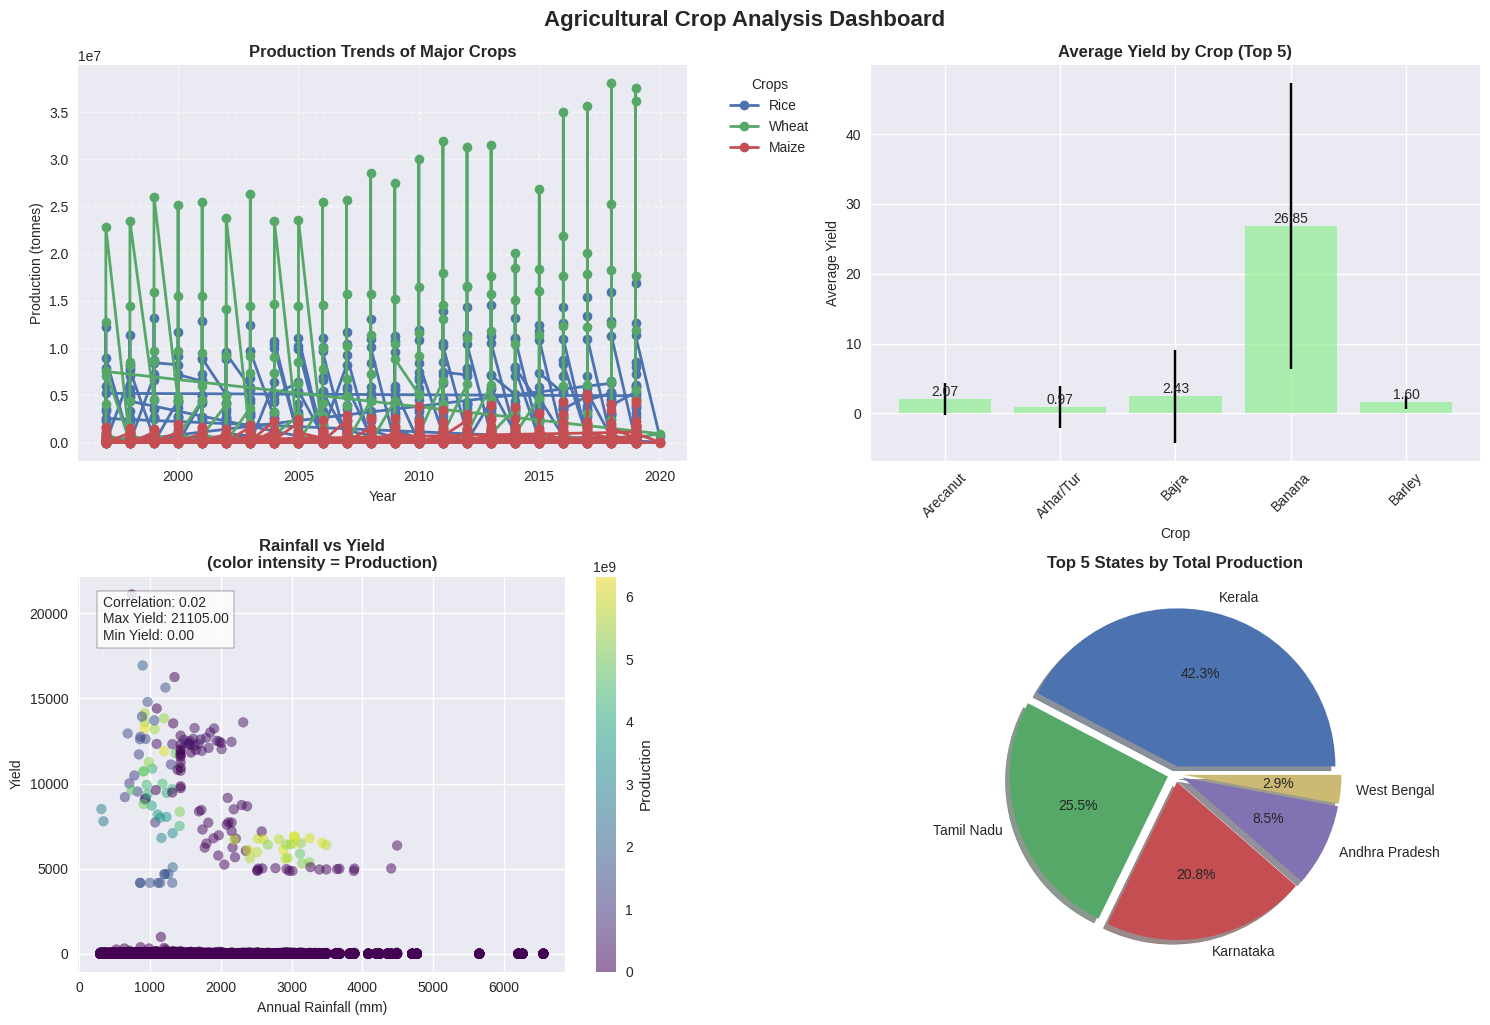

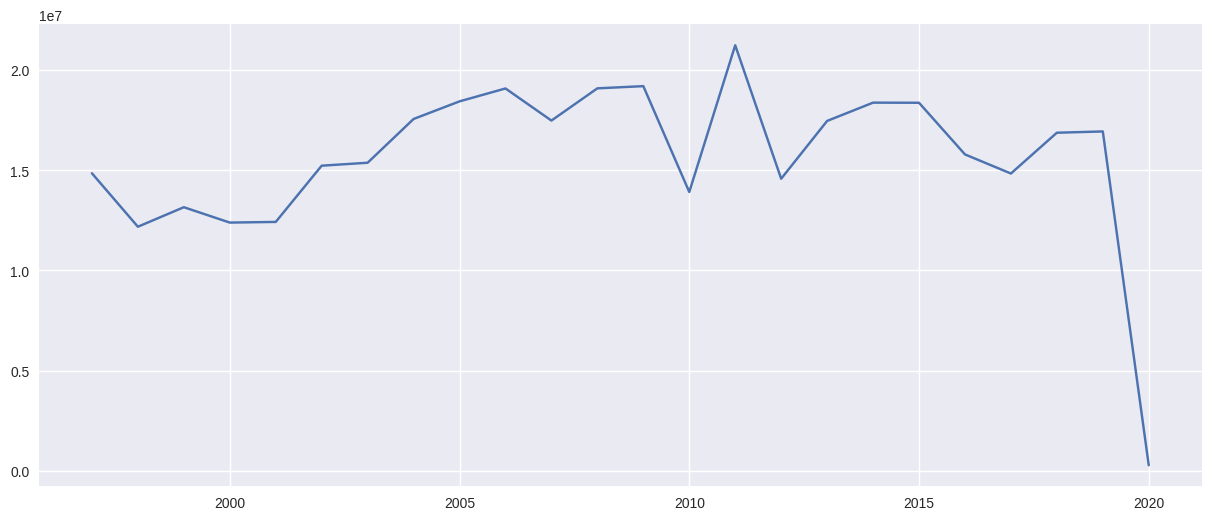

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('crop_yield.csv')
plt.style.use('seaborn')

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
crops = ['Rice', 'Wheat', 'Maize']
for crop in crops:
    crop_data = df[df['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'], label=crop, marker='o', linewidth=2)

plt.title('Production Trends of Major Crops', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Production (tonnes)', fontsize=10)
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
crop_means = df.groupby('Crop')['Yield'].mean()
crop_std = df.groupby('Crop')['Yield'].std()

plt.bar(crop_means.index[:5], crop_means[:5], yerr=crop_std[:5], capsize=5, alpha=0.7, color='lightgreen')
plt.title('Average Yield by Crop (Top 5)', fontsize=12, fontweight='bold')
plt.xlabel('Crop', fontsize=10)
plt.ylabel('Average Yield', fontsize=10)
plt.xticks(rotation=45)

for i, v in enumerate(crop_means[:5]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.subplot(2, 2, 3)
plt.scatter(df['Annual_Rainfall'], df['Yield'], alpha=0.5, c=df['Production'], cmap='viridis')
plt.title('Rainfall vs Yield\n(color intensity = Production)', fontsize=12, fontweight='bold')
plt.xlabel('Annual Rainfall (mm)', fontsize=10)
plt.ylabel('Yield', fontsize=10)
plt.colorbar(label='Production')

stats_text = f'Correlation: {df["Annual_Rainfall"].corr(df["Yield"]):.2f}\n'
stats_text += f'Max Yield: {df["Yield"].max():.2f}\n'
stats_text += f'Min Yield: {df["Yield"].min():.2f}'
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='top')

plt.subplot(2, 2, 4)
top_states = df.groupby('State')['Production'].sum().nlargest(5)
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', explode=[0.05]*5, shadow=True)
plt.title('Top 5 States by Total Production', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Agricultural Crop Analysis Dashboard', fontsize=16, fontweight='bold', y=1.02)

plt.figure(figsize=(15, 6))
yearly_prod = df.groupby('Crop_Year')['Production'].mean()
plt.plot(yearly_prod)


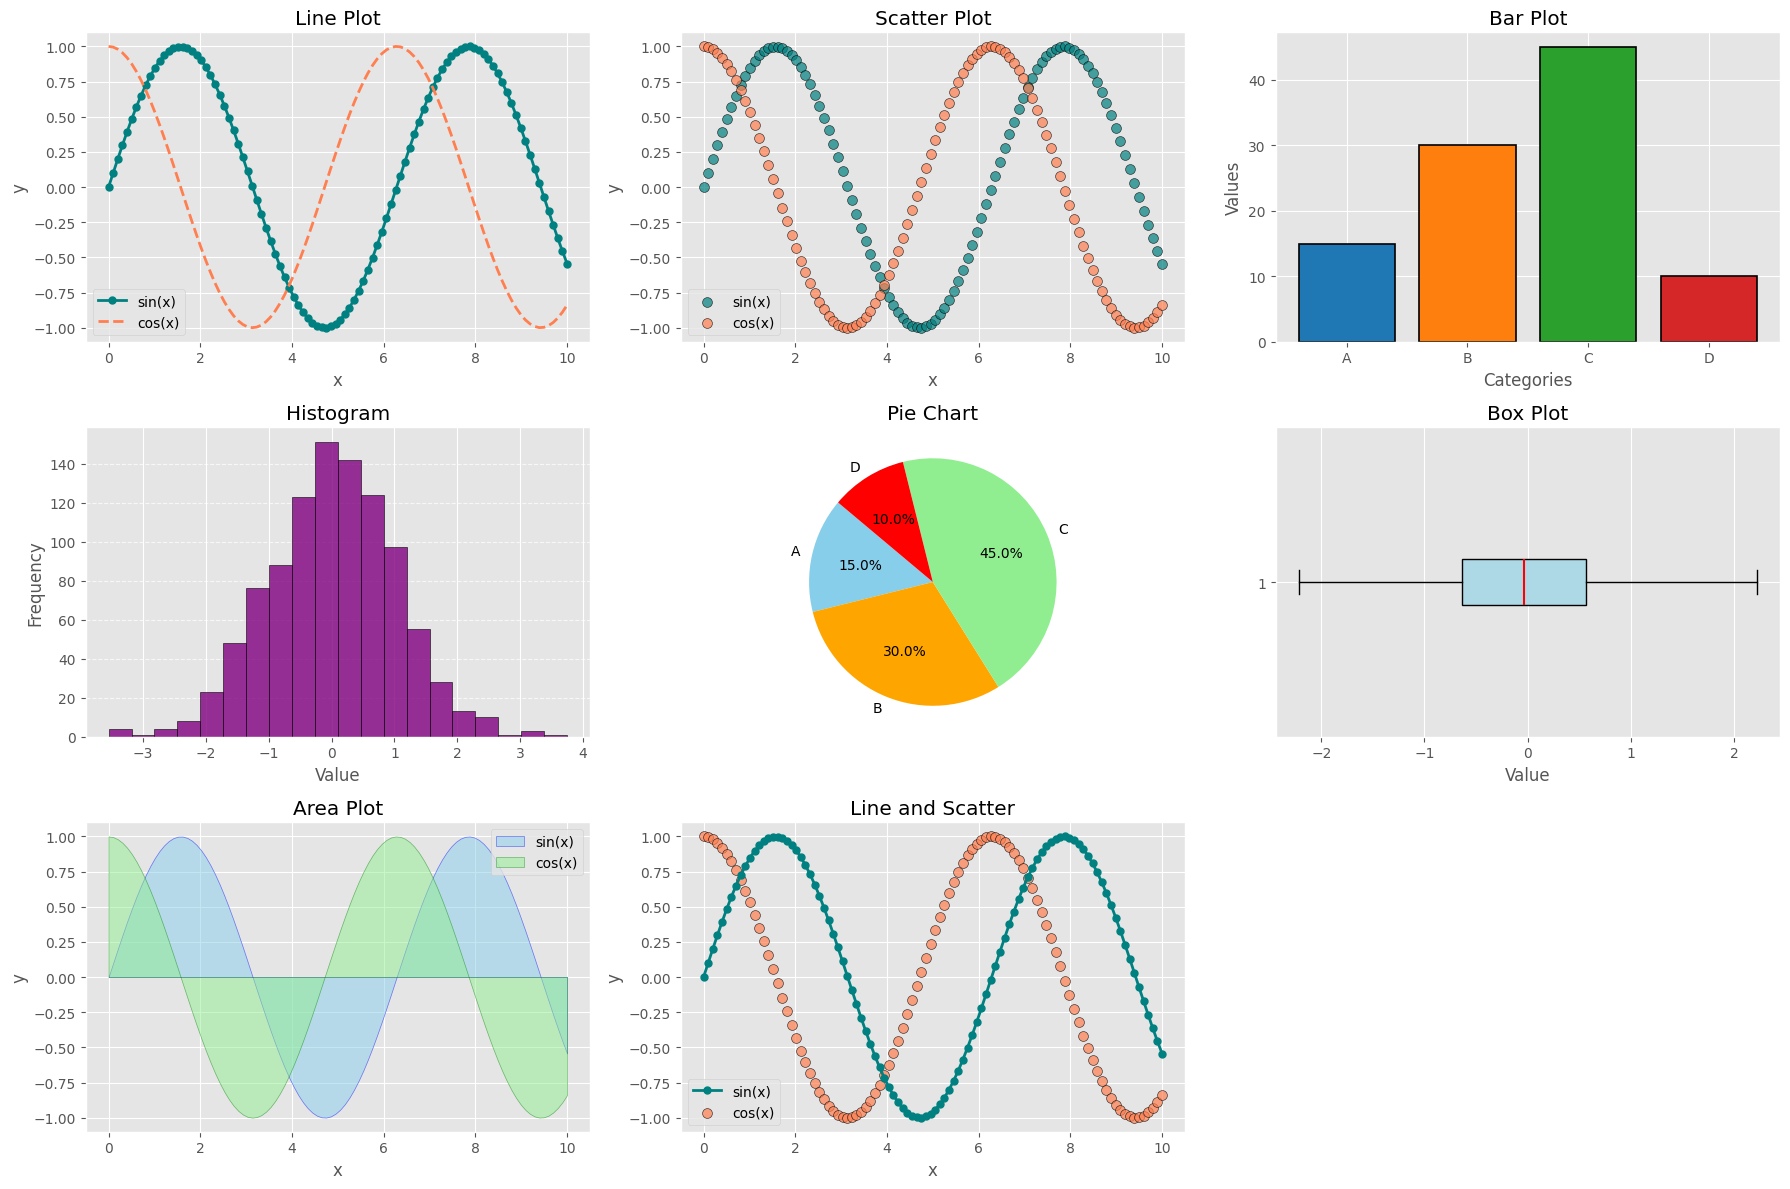

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)
categories = ['A', 'B', 'C', 'D']
values = [15, 30, 45, 10]
data = np.random.randn(1000)
category_data = pd.DataFrame({
    'Category': np.random.choice(categories, 200),
    'Value': np.random.randn(200)
})

# Plot Design
plt.style.use('ggplot')  # Apply a modern style
plt.figure(figsize=(18, 12))

# Line Plot
plt.subplot(3, 3, 1)
plt.plot(x, y, label='sin(x)', linewidth=2, color='teal', marker='o', markersize=5)
plt.plot(x, y2, label='cos(x)', linestyle='--', linewidth=2, color='coral')
plt.title("Line Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Scatter Plot
plt.subplot(3, 3, 2)
plt.scatter(x, y, label='sin(x)', c='teal', alpha=0.7, edgecolor='black', s=50)
plt.scatter(x, y2, label='cos(x)', c='coral', alpha=0.7, edgecolor='black', s=50)
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Bar Plot
plt.subplot(3, 3, 3)
plt.bar(categories, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], edgecolor='black', linewidth=1.2)
plt.title("Bar Plot")
plt.xlabel("Categories")
plt.ylabel("Values")

# Histogram
plt.subplot(3, 3, 4)
plt.hist(data, bins=20, color='purple', edgecolor='black', alpha=0.8)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Pie Chart
plt.subplot(3, 3, 5)
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140,
        colors=['skyblue', 'orange', 'lightgreen', 'red'], textprops={'fontsize': 10})
plt.title("Pie Chart")

# Box Plot
plt.subplot(3, 3, 6)
plt.boxplot(category_data['Value'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red', linewidth=1.5))
plt.title("Box Plot")
plt.xlabel("Value")

# Area Plot
plt.subplot(3, 3, 7)
plt.fill_between(x, y, color='skyblue', alpha=0.5, label='sin(x)', edgecolor='blue')
plt.fill_between(x, y2, color='lightgreen', alpha=0.5, label='cos(x)', edgecolor='green')
plt.title("Area Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Line and Scatter Combined
plt.subplot(3, 3, 8)
plt.plot(x, y, label='sin(x)', color='teal', linewidth=2, linestyle='-', marker='o', markersize=5)
plt.scatter(x, y2, label='cos(x)', color='coral', alpha=0.7, edgecolor='black', s=50)
plt.title("Line and Scatter")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Adjust Layout
plt.tight_layout()
plt.show()


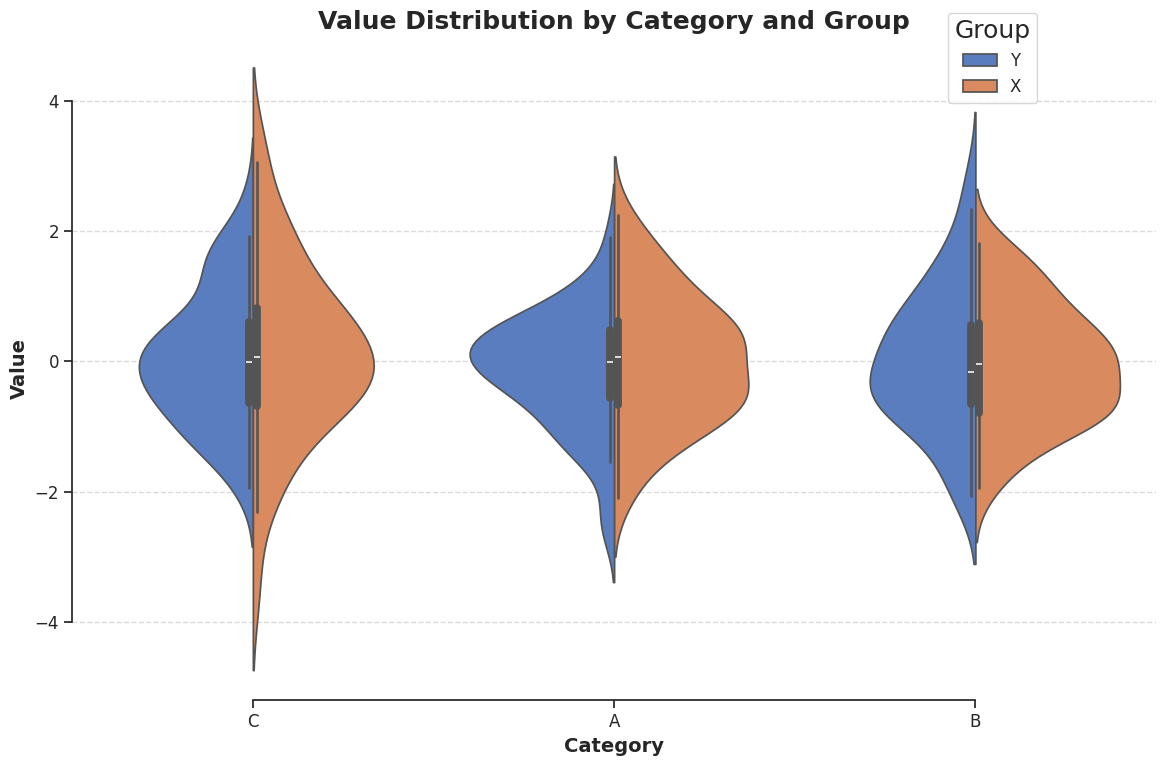

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(42)
data = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], 300),
    'Value': np.random.randn(300),
    'Group': np.random.choice(['X', 'Y'], 300)
})

# Set enhanced style
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5)
sns.set_palette("muted")

# Create the plot
plt.figure(figsize=(12, 8))
violin = sns.violinplot(x='Category', y='Value', hue='Group', data=data, split=True)

# Add customizations
plt.title("Value Distribution by Category and Group", fontsize=18, fontweight='bold', loc='center')
plt.xlabel("Category", fontsize=14, fontweight='bold')
plt.ylabel("Value", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move the legend inside the plot
plt.legend(title="Group", loc='upper left', bbox_to_anchor=(0.8, 1.05), fontsize=12)

# Add gridlines and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)
plt.tight_layout()
plt.show()
